# Exploring the Seattle lifestyle through Airbnb lens

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA

This project is divided in 5 sections
1. Introduction
2. Exploring Data
        2.1 The Data
3. Exploratory Data Analysis(EDA)
        3.1 Describing Features
        3.2 Descriptive Figures
            3.2.1 Distribution Plots
            3.2.2 
        3.3 Feature Engineering
4. Model Selection
        4.1 Data Preparation: Train and Test set
        4.2 Model Selection: Logistic Regression
5. Actionable Recommendations

# 1. Introduction
While looking at dataset to explore on Seattle, I looked on [Kaggle](www.kaggle.com) and found [Seattle Airbnb Open Data](https://www.kaggle.com/airbnb/seattle/data) Without any further thinking, I downloaded the dataset and started to explore it.

Before I started to explore the dataset,I had three questions in my mind to which I wanted to find answers.
1. What are the top 5 factors affecting which cause the rise in rent prices?
2. Which is the Peak Season and Off Season to visit Seattle in this year?
3. Who are the Top Hosts based on User Reviews and in which neighbourhoods are their properties located?

Can you describe the vibe of each Seattle neighborhood using listing descriptions?
What are the busiest times of the year to visit Seattle? By how much do prices spike?
Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

In [1]:
# Importing librairies
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer, fbeta_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline 

In [2]:
# Importing csv files for initial review
# Loading the data
df_calendar = pd.read_csv('./calendar.csv')
df_listings = pd.read_csv('./listings.csv')
df_reviews = pd.read_csv('./reviews.csv')

In [6]:
# Checking the shape of datasets

# calendar dataset contains Detailed Calendar Data for listings in Seattle
print("Shape of Calendar dataset:",df_calendar.shape);

# listings dataset contains Detailed Listings data for Seattle
print("Shape of Listings dataset:",df_listings.shape);

# reviews dataset contains Detailed Review Data for listings in Seattle
print("Shape of Reviews dataset:",df_reviews.shape);

Shape of Calendar dataset: (1393570, 4)
Shape of Listings dataset: (3818, 92)
Shape of Reviews dataset: (84849, 6)


In [9]:
# Review Listings dataset
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [231]:
df_listings.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [73]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [94]:
# checking the number of null values in each column of listings dataframe
df_listings.columns[df_listings.isnull().any()].tolist()

['summary',
 'space',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'zipcode',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

In [228]:
df_listings_price['price'] = df_listings_price['price'].str.replace(',', '')
df_listings_price['price'] = df_listings_price['price'].str.replace('$', '')
df_listings_price['price'] = df_listings_price['price'].astype(float)

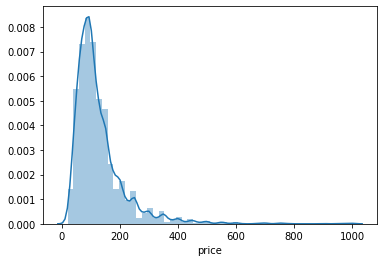

In [229]:
sns.distplot(df_listings_price['price']);

From above plot of price, it has right tailed distribution and price is more concentraded around $150. 

In [153]:
df_listings['monthly_price'].value_counts()

$2,500.00    66
$3,000.00    53
$2,000.00    52
$1,500.00    50
$3,500.00    49
             ..
$4,440.00     1
$2,498.00     1
$1,435.00     1
$3,850.00     1
$7,750.00     1
Name: monthly_price, Length: 356, dtype: int64

In [226]:
print('Number of ids in Listings dataset are %d'%(df_listings.id.nunique()));
print('Number of Host Ids in Listing Dataset are %d'%(df_listings.host_id.nunique()));
print('Average number of Listings per Host are %f'%((df_listings.id.nunique())/(df_listings.host_id.nunique())));
print('Maximum listings for Host id %d are %d'%(df_listings.host_id.value_counts().idxmax(),df_listings.host_id.value_counts().max()));

Number of ids in Listings dataset are 3818
Number of Host Ids in Listing Dataset are 2751
Average number of Listings per Host are 1.387859
Maximum listings for Host id 8534462 are 46


In [227]:
# Detailed information about Host who has maximum number of listings in dataset (Host ID 8534462)
df_listings[df_listings.host_id == df_listings.host_id.value_counts().idxmax()]

id                           listing_url       scrape_id  \
1077  3380159  https://www.airbnb.com/rooms/3380159  20160104002432   
1149  6913706  https://www.airbnb.com/rooms/6913706  20160104002432   
1152  9885225  https://www.airbnb.com/rooms/9885225  20160104002432   
1155  6990477  https://www.airbnb.com/rooms/6990477  20160104002432   
1159  7840228  https://www.airbnb.com/rooms/7840228  20160104002432   
1230  6766708  https://www.airbnb.com/rooms/6766708  20160104002432   
1237  5874421  https://www.airbnb.com/rooms/5874421  20160104002432   
1238  8829474  https://www.airbnb.com/rooms/8829474  20160104002432   
1278  4569115  https://www.airbnb.com/rooms/4569115  20160104002432   
1298  9497431  https://www.airbnb.com/rooms/9497431  20160104002432   
1312  8891577  https://www.airbnb.com/rooms/8891577  20160104002432   
1323  8815061  https://www.airbnb.com/rooms/8815061  20160104002432   
1340  8815638  https://www.airbnb.com/rooms/8815638  20160104002432   
1366  9886971  https://www.airbnb.com/rooms/9886971  20160104002432   
1376  8829472  https://www.airbnb.com/rooms/8829472  20160104002432   
1377  5183938  https://www.airbnb.com/rooms/5183938  20160104002432   
1400  2392869  https://www.airbnb.com/rooms/2392869  20160104002432   
1404  1601714  https://www.airbnb.com/rooms/1601714  20160104002432   
1424  9031119  https://www.airbnb.com/rooms/9031119  20160104002432   
1460  7506165  https://www.airbnb.com/rooms/7506165  20160104002432   
1466  3891695  https://www.airbnb.com/rooms/3891695  20160104002432   
1469  8805211  https://www.airbnb.com/rooms/8805211  20160104002432   
1478  7510776  https://www.airbnb.com/rooms/7510776  20160104002432   
1481  9183380  https://www.airbnb.com/rooms/9183380  20160104002432   
1482  9201292  https://www.airbnb.com/rooms/9201292  20160104002432   
1500  4009508  https://www.airbnb.com/rooms/4009508  20160104002432   
1519  3971934  https://www.airbnb.com/rooms/3971934  20160104002432   
1532  9024838  https://www.airbnb.com/rooms/9024838  20160104002432   
1537  1954452  https://www.airbnb.com/rooms/1954452  20160104002432   
1548  5213468  https://www.airbnb.com/rooms/5213468  20160104002432   
1557  3868138  https://www.airbnb.com/rooms/3868138  20160104002432   
1559  6807981  https://www.airbnb.com/rooms/6807981  20160104002432   
1575  5372156  https://www.airbnb.com/rooms/5372156  20160104002432   
1606  9318524  https://www.airbnb.com/rooms/9318524  20160104002432   
1613  3803947  https://www.airbnb.com/rooms/3803947  20160104002432   
1631  2825852  https://www.airbnb.com/rooms/2825852  20160104002432   
1637  9318440  https://www.airbnb.com/rooms/9318440  20160104002432   
1645  4410544  https://www.airbnb.com/rooms/4410544  20160104002432   
1652  9530877  https://www.airbnb.com/rooms/9530877  20160104002432   
1654  9530788  https://www.airbnb.com/rooms/9530788  20160104002432   
1657  4031625  https://www.airbnb.com/rooms/4031625  20160104002432   
1660  4106041  https://www.airbnb.com/rooms/4106041  20160104002432   
1667  6807884  https://www.airbnb.com/rooms/6807884  20160104002432   
1695  4008373  https://www.airbnb.com/rooms/4008373  20160104002432   
2748  2004931  https://www.airbnb.com/rooms/2004931  20160104002432   
2892  4009295  https://www.airbnb.com/rooms/4009295  20160104002432   

     last_scraped                                 name  \
1077   2016-01-04          Pike's Place. 100 Walkscore   
1149   2016-01-04     Westlake Ave Downtown Condos 1BD   
1152   2016-01-04   Westlake Ave Downtown Condos 1BD 4   
1155   2016-01-04   Westlake Ave Downtown Condos 1BD 2   
1159   2016-01-04   Westlake Ave Downtown Condos 1BD 3   
1230   2016-01-04            100 Walk Score - Lux 2Bed   
1237   2016-01-04       Great Location. 98 Walkscore 2   
1238   2016-01-04                Belltown Condos 1BD 4   
1278   2016-01-04   Downtown 2Bed Western Sunset Views   
1298   2016-01-04    Sky High Water View. 99 Walkscore   
1312   2016-01-04     Sky High Pent

In [155]:
df_listings.shape[0]

3818

In [156]:
df_listings.host_id.nunique()

2751

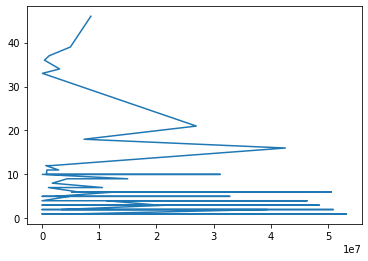

In [159]:
plt.plot(df_listings.host_id.value_counts());
plt.show();

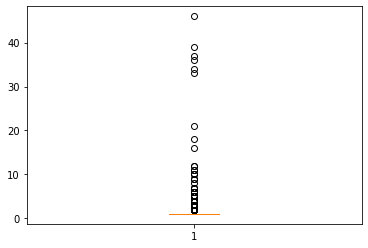

In [179]:
plt.boxplot(df_listings.host_id.value_counts());
plt.show();

In [181]:
df_listings.host_id.value_counts().sum()

3818

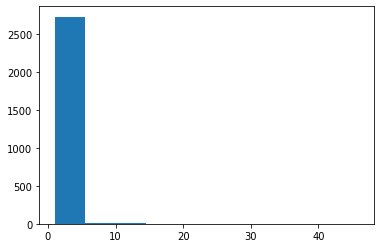

In [169]:
host_prop_cnt = df_listings.groupby(['host_id'])['id'].count();
plt.hist(host_prop_cnt);
plt.show();

In [171]:
host_prop_cnt.shape

(2751,)

In [158]:
df_listings.host_id.value_counts()

8534462     46
4962900     39
1243056     37
430709      36
3074414     34
            ..
38090170     1
11839982     1
668141       1
1691632      1
10420224     1
Name: host_id, Length: 2751, dtype: int64

In [130]:
price_bins = df_listings.price.value_counts().to_frame()

In [138]:
list(price_bins.index)

['$150.00',
 '$100.00',
 '$75.00',
 '$99.00',
 '$95.00',
 '$90.00',
 '$125.00',
 '$85.00',
 '$65.00',
 '$80.00',
 '$110.00',
 '$70.00',
 '$55.00',
 '$120.00',
 '$200.00',
 '$175.00',
 '$60.00',
 '$50.00',
 '$115.00',
 '$250.00',
 '$69.00',
 '$40.00',
 '$105.00',
 '$79.00',
 '$129.00',
 '$135.00',
 '$89.00',
 '$130.00',
 '$45.00',
 '$49.00',
 '$59.00',
 '$225.00',
 '$139.00',
 '$109.00',
 '$149.00',
 '$350.00',
 '$140.00',
 '$300.00',
 '$145.00',
 '$195.00',
 '$119.00',
 '$165.00',
 '$160.00',
 '$35.00',
 '$39.00',
 '$68.00',
 '$275.00',
 '$199.00',
 '$180.00',
 '$155.00',
 '$42.00',
 '$98.00',
 '$97.00',
 '$78.00',
 '$170.00',
 '$88.00',
 '$58.00',
 '$400.00',
 '$82.00',
 '$325.00',
 '$169.00',
 '$185.00',
 '$220.00',
 '$93.00',
 '$245.00',
 '$30.00',
 '$72.00',
 '$190.00',
 '$295.00',
 '$38.00',
 '$126.00',
 '$67.00',
 '$215.00',
 '$62.00',
 '$52.00',
 '$375.00',
 '$87.00',
 '$74.00',
 '$53.00',
 '$450.00',
 '$159.00',
 '$47.00',
 '$92.00',
 '$183.00',
 '$189.00',
 '$138.00',
 '$122.0

In [11]:
df_listings['calendar_last_scraped'].value_counts()

2016-01-04    3818
Name: calendar_last_scraped, dtype: int64

In [17]:
print(("Rows %s and Columns %s")%(df_listings.shape[0], df_listings.shape[1]))

Rows 3818 and Columns 92


In [22]:
df_listings.host_id.value_counts().nlargest()

8534462    46
4962900    39
1243056    37
430709     36
3074414    34
Name: host_id, dtype: int64

In [31]:
df_listings[df_listings.host_id==8534462].head()

id                           listing_url       scrape_id  \
1077  3380159  https://www.airbnb.com/rooms/3380159  20160104002432   
1149  6913706  https://www.airbnb.com/rooms/6913706  20160104002432   
1152  9885225  https://www.airbnb.com/rooms/9885225  20160104002432   
1155  6990477  https://www.airbnb.com/rooms/6990477  20160104002432   
1159  7840228  https://www.airbnb.com/rooms/7840228  20160104002432   

     last_scraped                                name  \
1077   2016-01-04         Pike's Place. 100 Walkscore   
1149   2016-01-04    Westlake Ave Downtown Condos 1BD   
1152   2016-01-04  Westlake Ave Downtown Condos 1BD 4   
1155   2016-01-04  Westlake Ave Downtown Condos 1BD 2   
1159   2016-01-04  Westlake Ave Downtown Condos 1BD 3   

                                                summary  \
1077  With a 100% Walk-Score, this spacious 1BD apar...   
1149  98 Walkscore unit on a high floor right downto...   
1152  98 Walkscore Penthouse unit on the top floor, ...   
1155  98 Walkscore unit on a high floor right downto...   
1159  98 Walkscore Penthouse unit on the top floor, ...   

                                                  space  \
1077  With a 100% Walk-Score, this spacious 1BD apar...   
1149  *About the Neighborhood* The neighborhood is r...   
1152                                                NaN   
1155  Other units in the same building:  https://www...   
1159  *About the Neighborhood* The neighborhood is r...   

                                            description experiences_offered  \
1077  With a 100% Walk-Score, this spacious 1BD apar...                none   
1149  98 Walkscore unit on a high floor right downto...                none   
1152  98 Walkscore Penthouse unit on the top floor, ...                none   
1155  98 Walkscore unit on a high floor right downto...                none   
1159  98 Walkscore Penthouse unit on the top floor, ...                none   

     neighborhood_overview  ... review_scores_value requires_license license  \
1077                   NaN  ...                 9.0                f     NaN   
1149                   NaN  ...                 9.0                f     NaN   
1152                   NaN  ...                 NaN                f     NaN   
1155                   NaN  ...                10.0                f     NaN   
1159                   NaN  ...                 9.0                f     NaN   

     jurisdiction_names instant_bookable cancellation_policy  \
1077         WASHINGTON                f              strict   
1149         WASHINGTON                f              strict   
1152         WASHINGTON                f              strict   
1155         WASHINGTON                f              strict   
1159         WASHINGTON                f              strict   

      require_guest_profile_picture require_guest_phone_verification  \
1077                              t                                t   
1149                              t                                t   
1152                              t                                t   
1155                              t                                t   
1159                              t                                t   

     calculated_host_listings_count reviews_per_month  
1077                              3              2.71  
1149                              3              3.11  
1152                              3               NaN  
1155                              3              4.24  
1159                              3              1.27  

[5 rows x 92 columns]

In [32]:
df_listings[df_listings.host_id==4962900].head()

id                           listing_url       scrape_id  \
1065   936484   https://www.airbnb.com/rooms/936484  20160104002432   
1067   938785   https://www.airbnb.com/rooms/938785  20160104002432   
1068   934216   https://www.airbnb.com/rooms/934216  20160104002432   
1209  4410493  https://www.airbnb.com/rooms/4410493  20160104002432   
1265  5446176  https://www.airbnb.com/rooms/5446176  20160104002432   

     last_scraped                                 name  \
1065   2016-01-04   Marketside Flats next to Pike! MS1   
1067   2016-01-04  Best Ocean Views By Pike Place! PA1   
1068   2016-01-04   Amazing Waterview! PIKE PLACE! HSW   
1209   2016-01-04       Heart of Downtown Seattle! SH2   
1265   2016-01-04  Amazing Location, Great Dining! V62   

                                                summary  \
1065  The Marketside Flats is a fantastic home base ...   
1067  Post Alley Court offers amazing views of Ellio...   
1068  One block from Pike Place Market, the best of ...   
1209  The Shelby is centrally located at the interse...   
1265  Via6 is downtown Seattle's hottest new vertica...   

                                                  space  \
1065  LOCATED RIGHT NEXT TO PIKE PLACE MARKET!!! You...   
1067  Water views from balcony, only 1/2 block to Pi...   
1068  UNIT HAS BEEN RENOVATED! UPDATED PICS COMING S...   
1209  Life at the Shelby is about enjoying everythin...   
1265  Via6 in Seattle is a brand new property for us...   

                                            description experiences_offered  \
1065  The Marketside Flats is a fantastic home base ...                none   
1067  Post Alley Court offers amazing views of Ellio...                none   
1068  One block from Pike Place Market, the best of ...                none   
1209  The Shelby is centrally located at the interse...                none   
1265  Via6 is downtown Seattle's hottest new vertica...                none   

                                  neighborhood_overview  ...  \
1065  In the heart of Downtown Seattle! Nearby Attra...  ...   
1067  In the heart of Downtown Seattle! Nearby Attra...  ...   
1068  In the heart of Downtown Seattle! Nearby Attra...  ...   
1209  In the heart of Downtown Seattle! Nearby Attra...  ...   
1265  In the heart of Downtown Seattle! Nearby Attra...  ...   

     review_scores_value requires_license license jurisdiction_names  \
1065                 9.0                f     NaN         WASHINGTON   
1067                 9.0                f     NaN         WASHINGTON   
1068                 9.0                f     NaN         WASHINGTON   
1209                 9.0                f     NaN         WASHINGTON   
1265                10.0                f     NaN         WASHINGTON   

     instant_bookable cancellation_policy  require_guest_profile_picture  \
1065                f              strict                              f   
1067                f              strict                              f   
1068                f              strict                              f   
1209                f              strict                              f   
1265                f              strict                              f   

     require_guest_phone_verification calculated_host_listings_count  \
1065                                f                              1   
1067                                f                              1   
1068                                f                              1   
1209                                f                              1   
1265                                f                              1   

     reviews_per_month  
1065              0.46  
1067              0.63  
1068              0.68  
1209              0.81  
1265              1.40  

[5 rows x 92 columns]

In [35]:
df_listings[df_listings.price==np.max(df_listings.price)].head()

id                           listing_url       scrape_id  \
1208  3345341  https://www.airbnb.com/rooms/3345341  20160104002432   

     last_scraped                           name  \
1208   2016-01-04  100% Walk Score 1-BR Downtown   

                                                summary  \
1208  100% Walk Score close to the Convention Center...   

                                                  space  \
1208  The space seeks to feel like home while giving...   

                                            description experiences_offered  \
1208  100% Walk Score close to the Convention Center...                none   

                                  neighborhood_overview  ...  \
1208  This neighborhood is AWESOME! We are: - 1 stre...  ...   

     review_scores_value requires_license license jurisdiction_names  \
1208                 9.0                f     NaN         WASHINGTON   

     instant_bookable cancellation_policy  require_guest_profile_picture  \
1208                f            moderate                              f   

     require_guest_phone_verification calculated_host_listings_count  \
1208                                f                              1   

     reviews_per_month  
1208              2.89  

[1 rows x 92 columns]

In [42]:
df_listings.price.value_counts().nlargest()

$150.00    162
$100.00    159
$75.00     118
$99.00     110
$95.00     110
Name: price, dtype: int64

In [51]:
list(df_listings.price.unique())

['$85.00',
 '$150.00',
 '$975.00',
 '$100.00',
 '$450.00',
 '$120.00',
 '$80.00',
 '$60.00',
 '$90.00',
 '$95.00',
 '$99.00',
 '$245.00',
 '$165.00',
 '$461.00',
 '$109.00',
 '$66.00',
 '$200.00',
 '$700.00',
 '$110.00',
 '$75.00',
 '$600.00',
 '$45.00',
 '$300.00',
 '$175.00',
 '$325.00',
 '$222.00',
 '$159.00',
 '$125.00',
 '$348.00',
 '$148.00',
 '$350.00',
 '$349.00',
 '$160.00',
 '$130.00',
 '$137.00',
 '$20.00',
 '$145.00',
 '$400.00',
 '$70.00',
 '$170.00',
 '$465.00',
 '$50.00',
 '$59.00',
 '$47.00',
 '$55.00',
 '$65.00',
 '$25.00',
 '$40.00',
 '$149.00',
 '$129.00',
 '$105.00',
 '$218.00',
 '$126.00',
 '$115.00',
 '$225.00',
 '$89.00',
 '$134.00',
 '$375.00',
 '$97.00',
 '$197.00',
 '$135.00',
 '$180.00',
 '$69.00',
 '$195.00',
 '$224.00',
 '$338.00',
 '$79.00',
 '$49.00',
 '$57.00',
 '$96.00',
 '$295.00',
 '$53.00',
 '$35.00',
 '$133.00',
 '$61.00',
 '$52.00',
 '$275.00',
 '$199.00',
 '$435.00',
 '$250.00',
 '$116.00',
 '$39.00',
 '$98.00',
 '$73.00',
 '$190.00',
 '$68.00',
 

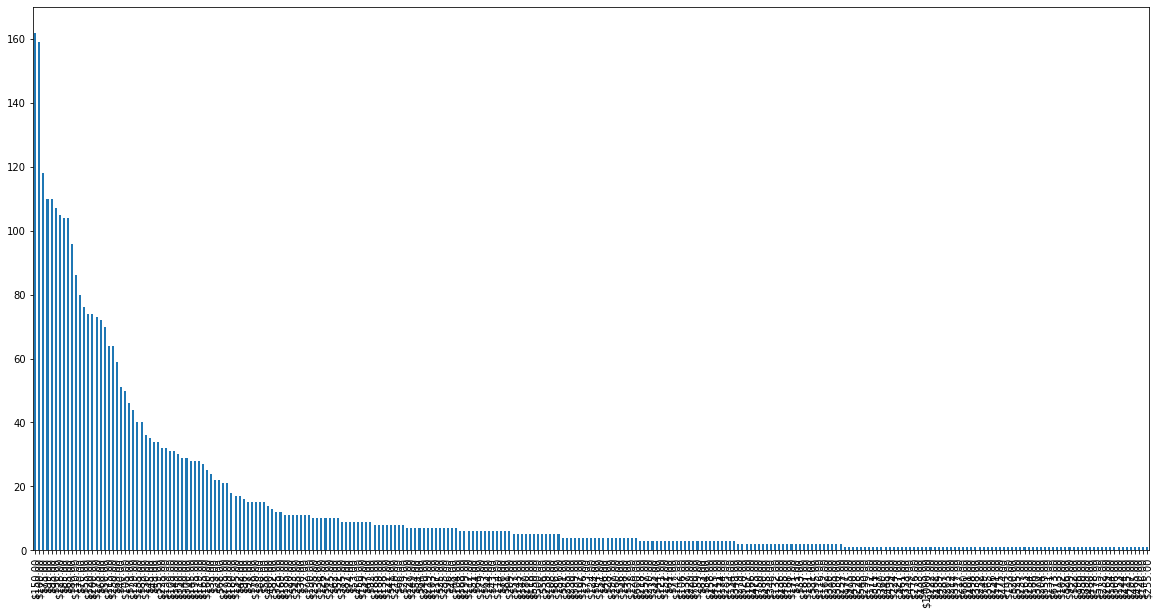

In [71]:
# plt.hist(df_listings[df_listings.price == np.max(df_listings.price)], bins=5);
fig, ax = plt.subplots(figsize=(20, 10))
df_listings['price'].value_counts().plot(kind='bar');

In [49]:
df_listings['review_scores_value'].head()

0    10.0
1    10.0
2    10.0
3     NaN
4     9.0
Name: review_scores_value, dtype: float64

In [27]:
df_listings.city.value_counts().nlargest()

Seattle             3810
West Seattle           2
Seattle                2
seattle                1
Ballard, Seattle       1
Name: city, dtype: int64

In [72]:
df_listings.describe().transpose()

count          mean           std  \
id                              3818.0  5.550111e+06  2.962660e+06   
scrape_id                       3818.0  2.016010e+13  0.000000e+00   
host_id                         3818.0  1.578556e+07  1.458382e+07   
host_listings_count             3816.0  7.157757e+00  2.862815e+01   
host_total_listings_count       3816.0  7.157757e+00  2.862815e+01   
latitude                        3818.0  4.762896e+01  4.305195e-02   
longitude                       3818.0 -1.223331e+02  3.174451e-02   
accommodates                    3818.0  3.349398e+00  1.977599e+00   
bathrooms                       3802.0  1.259469e+00  5.903691e-01   
bedrooms                        3812.0  1.307712e+00  8.833949e-01   
beds                            3817.0  1.735394e+00  1.139480e+00   
square_feet                       97.0  8.546186e+02  6.714049e+02   
guests_included                 3818.0  1.672603e+00  1.311040e+00   
minimum_nights                  3818.0  2.369303e+00  1.630590e+01   
maximum_nights                  3818.0  7.804476e+02  1.683589e+03   
availability_30                 3818.0  1.678628e+01  1.217364e+01   
availability_60                 3818.0  3.681482e+01  2.333754e+01   
availability_90                 3818.0  5.808250e+01  3.406385e+01   
availability_365                3818.0  2.447727e+02  1.267725e+02   
number_of_reviews               3818.0  2.222342e+01  3.773089e+01   
review_scores_rating            3171.0  9.453926e+01  6.606083e+00   
review_scores_accuracy          3160.0  9.636392e+00  6.980312e-01   
review_scores_cleanliness       3165.0  9.556398e+00  7.972739e-01   
review_scores_checkin           3160.0  9.786709e+00  5.954990e-01   
review_scores_communication     3167.0  9.809599e+00  5.682114e-01   
review_scores_location          3163.0  9.608916e+00  6.290532e-01   
review_scores_value             3162.0  9.452245e+00  7.502586e-01   
license                            0.0           NaN           NaN   
calculated_host_listings_count  3818.0  2.946307e+00  5.893029e+00   
reviews_per_month               3191.0  2.078919e+00  1.822348e+00   

                                         min           25%           50%  \
id                              3.335000e+03  3.258256e+06  6.118244e+06   
scrape_id                       2.016010e+13  2.016010e+13  2.016010e+13   
host_id                         4.193000e+03  3.275204e+06  1.055814e+07   
host_listings_count             1.000000e+00  1.000000e+00  1.000000e+00   
host_total_listings_count       1.000000e+00  1.000000e+00  1.000000e+00   
latitude                        4.750509e+01  4.760942e+01  4.762360e+01   
longitude                      -1.224172e+02 -1.223543e+02 -1.223289e+02   
accommodates                    1.000000e+00  2.000000e+00  3.000000e+00   
bathrooms                       0.000000e+00  1.000000e+00  1.000000e+00   
bedrooms                        0.000000e+00  1.000000e+00  1.000000e+00   
beds                            1.000000e+00  1.000000e+00  1.000000e+00   
square_feet                     0.000000e+00  4.200000e+02  7.500000e+02   
guests_included                 0.000000e+00  1.000000e+00  1.000000e+00   
minimum_nights                  1.000000e+00  1.000000e+00  2.000000e+00   
maximum_nights                  1.000000e+00  6.000000e+01  1.125000e+03   
availability_30                 0.000000e+00  2.000000e+00  2.000000e+01   
availability_60                 0.000000e+00  1.300000e+01  4.600000e+01   
availability_90                 0.000000e+00  2.800000e+01  7.300000e+01   
availability_365                0.000000e+00  1.240000e+02  3.080000e+02   
number_of_reviews               0.000000e+00  2.000000e+00  9.000000e+00   
review_scores_rating            2.000000e+01  9.300000e+01  9.600000e+01   
review_scores_accuracy          2.000000e+00  9.000000e+00  1.000000e+01   
review_scores_cleanliness       3.000000e+00  9.000000e+00  1.000000e+01   
review_scores_checkin           2.0000

In [23]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [6]:
df.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [7]:
df.date.max()

'2017-01-02'

In [8]:
df.date.min()

'2016-01-04'

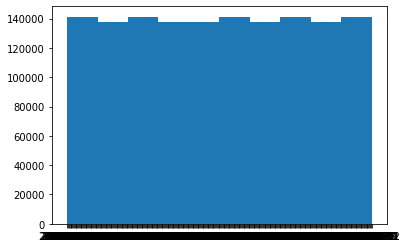

In [10]:
plt.hist(df['date'])
plt.show()

In [11]:
df.date.nunique()

365

In [12]:
df.shape[0]/df.date.nunique()

3818.0

In [14]:
df.price.isnull().mean()

0.32938998399793334

In [17]:
df.listing_id.nunique()

3818

In [20]:
df_listings.shape

(3818, 92)

In [21]:
df_calendar.shape

(1393570, 4)

In [22]:
df_reviews.shape

(84849, 6)

In [23]:
df_listings.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [24]:
list(df_listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [27]:
df_listings.loc[:,('id', 'host_name')].head()

id host_name
0   241032     Maija
1   953595    Andrea
2  3308979      Jill
3  7421966     Emily
4   278830     Emily

In [28]:
df_listings.shape

(3818, 92)

In [40]:
df_listings.groupby(['host_id']).count()['id'].nlargest()

host_id
8534462    46
4962900    39
1243056    37
430709     36
3074414    34
Name: id, dtype: int64

In [41]:
df_listings.shape[0]

3818

In [66]:
df_listings.loc[df_listings.host_id == 8534462, (['id', 'host_id', 'host_name', 'host_location', 'description'])]

id  host_id host_name                       host_location  \
1077  3380159  8534462   Daniela  Seattle, Washington, United States   
1149  6913706  8534462   Daniela  Seattle, Washington, United States   
1152  9885225  8534462   Daniela  Seattle, Washington, United States   
1155  6990477  8534462   Daniela  Seattle, Washington, United States   
1159  7840228  8534462   Daniela  Seattle, Washington, United States   
1230  6766708  8534462   Daniela  Seattle, Washington, United States   
1237  5874421  8534462   Daniela  Seattle, Washington, United States   
1238  8829474  8534462   Daniela  Seattle, Washington, United States   
1278  4569115  8534462   Daniela  Seattle, Washington, United States   
1298  9497431  8534462   Daniela  Seattle, Washington, United States   
1312  8891577  8534462   Daniela  Seattle, Washington, United States   
1323  8815061  8534462   Daniela  Seattle, Washington, United States   
1340  8815638  8534462   Daniela  Seattle, Washington, United States   
1366  9886971  8534462   Daniela  Seattle, Washington, United States   
1376  8829472  8534462   Daniela  Seattle, Washington, United States   
1377  5183938  8534462   Daniela  Seattle, Washington, United States   
1400  2392869  8534462   Daniela  Seattle, Washington, United States   
1404  1601714  8534462   Daniela  Seattle, Washington, United States   
1424  9031119  8534462   Daniela  Seattle, Washington, United States   
1460  7506165  8534462   Daniela  Seattle, Washington, United States   
1466  3891695  8534462   Daniela  Seattle, Washington, United States   
1469  8805211  8534462   Daniela  Seattle, Washington, United States   
1478  7510776  8534462   Daniela  Seattle, Washington, United States   
1481  9183380  8534462   Daniela  Seattle, Washington, United States   
1482  9201292  8534462   Daniela  Seattle, Washington, United States   
1500  4009508  8534462   Daniela  Seattle, Washington, United States   
1519  3971934  8534462   Daniela  Seattle, Washington, United States   
1532  9024838  8534462   Daniela  Seattle, Washington, United States   
1537  1954452  8534462   Daniela  Seattle, Washington, United States   
1548  5213468  8534462   Daniela  Seattle, Washington, United States   
1557  3868138  8534462   Daniela  Seattle, Washington, United States   
1559  6807981  8534462   Daniela  Seattle, Washington, United States   
1575  5372156  8534462   Daniela  Seattle, Washington, United States   
1606  9318524  8534462   Daniela  Seattle, Washington, United States   
1613  3803947  8534462   Daniela  Seattle, Washington, United States   
1631  2825852  8534462   Daniela  Seattle, Washington, United States   
1637  9318440  8534462   Daniela  Seattle, Washington, United States   
1645  4410544  8534462   Daniela  Seattle, Washington, United States   
1652  9530877  8534462   Daniela  Seattle, Washington, United States   
1654  9530788  8534462   Daniela  Seattle, Washington, United States   
1657  4031625  8534462   Daniela  Seattle, Washington, United States   
1660  4106041  8534462   Daniela  Seattle, Washington, United States   
1667  6807884  8534462   Daniela  Seattle, Washington, United States   
1695  4008373  8534462   Daniela  Seattle, Washington, United States   
2748  2004931  8534462   Daniela  Seattle, Washington, United States   
2892  4009295  8534462   Daniela  Seattle, Washington, United States   

                                            description  
1077  With a 100% Walk-Score, this spacious 1BD apar...  
1149  98 Walkscore unit on a high floor right downto...  
1152  98 Walkscore Penthouse unit on the top floor, ...  
1155  98 Walkscore unit on a high floor right downto...  
1159  98 Walkscore Penthouse unit on the top floor, ...  
1230  With an unbeatable 100 Walkscore, this luxurio...  
1237  Right at the heart of Seattle's fastest-growin...  
1238  *Clear View of New Year's Eve Space Needle Fir...  
1278  Comfortable 2Bed in Belltown. Close to the Spa...  
1298  Best place to ring in the new year with 

In [47]:
df_listings['host_id'].head()

0      956883
1     5177328
2    16708587
3     9851441
4     1452570
Name: host_id, dtype: int64

In [64]:
df_listings['host_location'].value_counts().head(10)

Seattle, Washington, United States          3259
US                                           246
Spokane, Washington, United States            41
Kent, Washington, United States               34
Los Angeles, California, United States        13
Bellevue, Washington, United States           12
San Francisco, California, United States      11
Mercer Island, Washington, United States      10
Kirkland, Washington, United States            8
New York, New York, United States              6
Name: host_location, dtype: int64

In [72]:
df_listings.loc[1077,:]

id                                                               3380159
listing_url                         https://www.airbnb.com/rooms/3380159
scrape_id                                                 20160104002432
last_scraped                                                  2016-01-04
name                                         Pike's Place. 100 Walkscore
                                                    ...                 
cancellation_policy                                               strict
require_guest_profile_picture                                          t
require_guest_phone_verification                                       t
calculated_host_listings_count                                         3
reviews_per_month                                                   2.71
Name: 1077, Length: 92, dtype: object

In [74]:
df_listings['host_id'].value_counts().nlargest()

8534462    46
4962900    39
1243056    37
430709     36
3074414    34
Name: host_id, dtype: int64

In [77]:
df_listings[df_listings.id == 7421966]

id                           listing_url       scrape_id last_scraped  \
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   

                 name                                            summary  \
3  Queen Anne Chateau  A charming apartment that sits atop Queen Anne...   

  space                                        description  \
3   NaN  A charming apartment that sits atop Queen Anne...   

  experiences_offered neighborhood_overview  ... review_scores_value  \
3                none                   NaN  ...                 NaN   

  requires_license license jurisdiction_names instant_bookable  \
3                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
3            flexible                              f   

  require_guest_phone_verification calculated_host_listings_count  \
3                                f                              1   

  reviews_per_month  
3               NaN  

[1 rows x 92 columns]

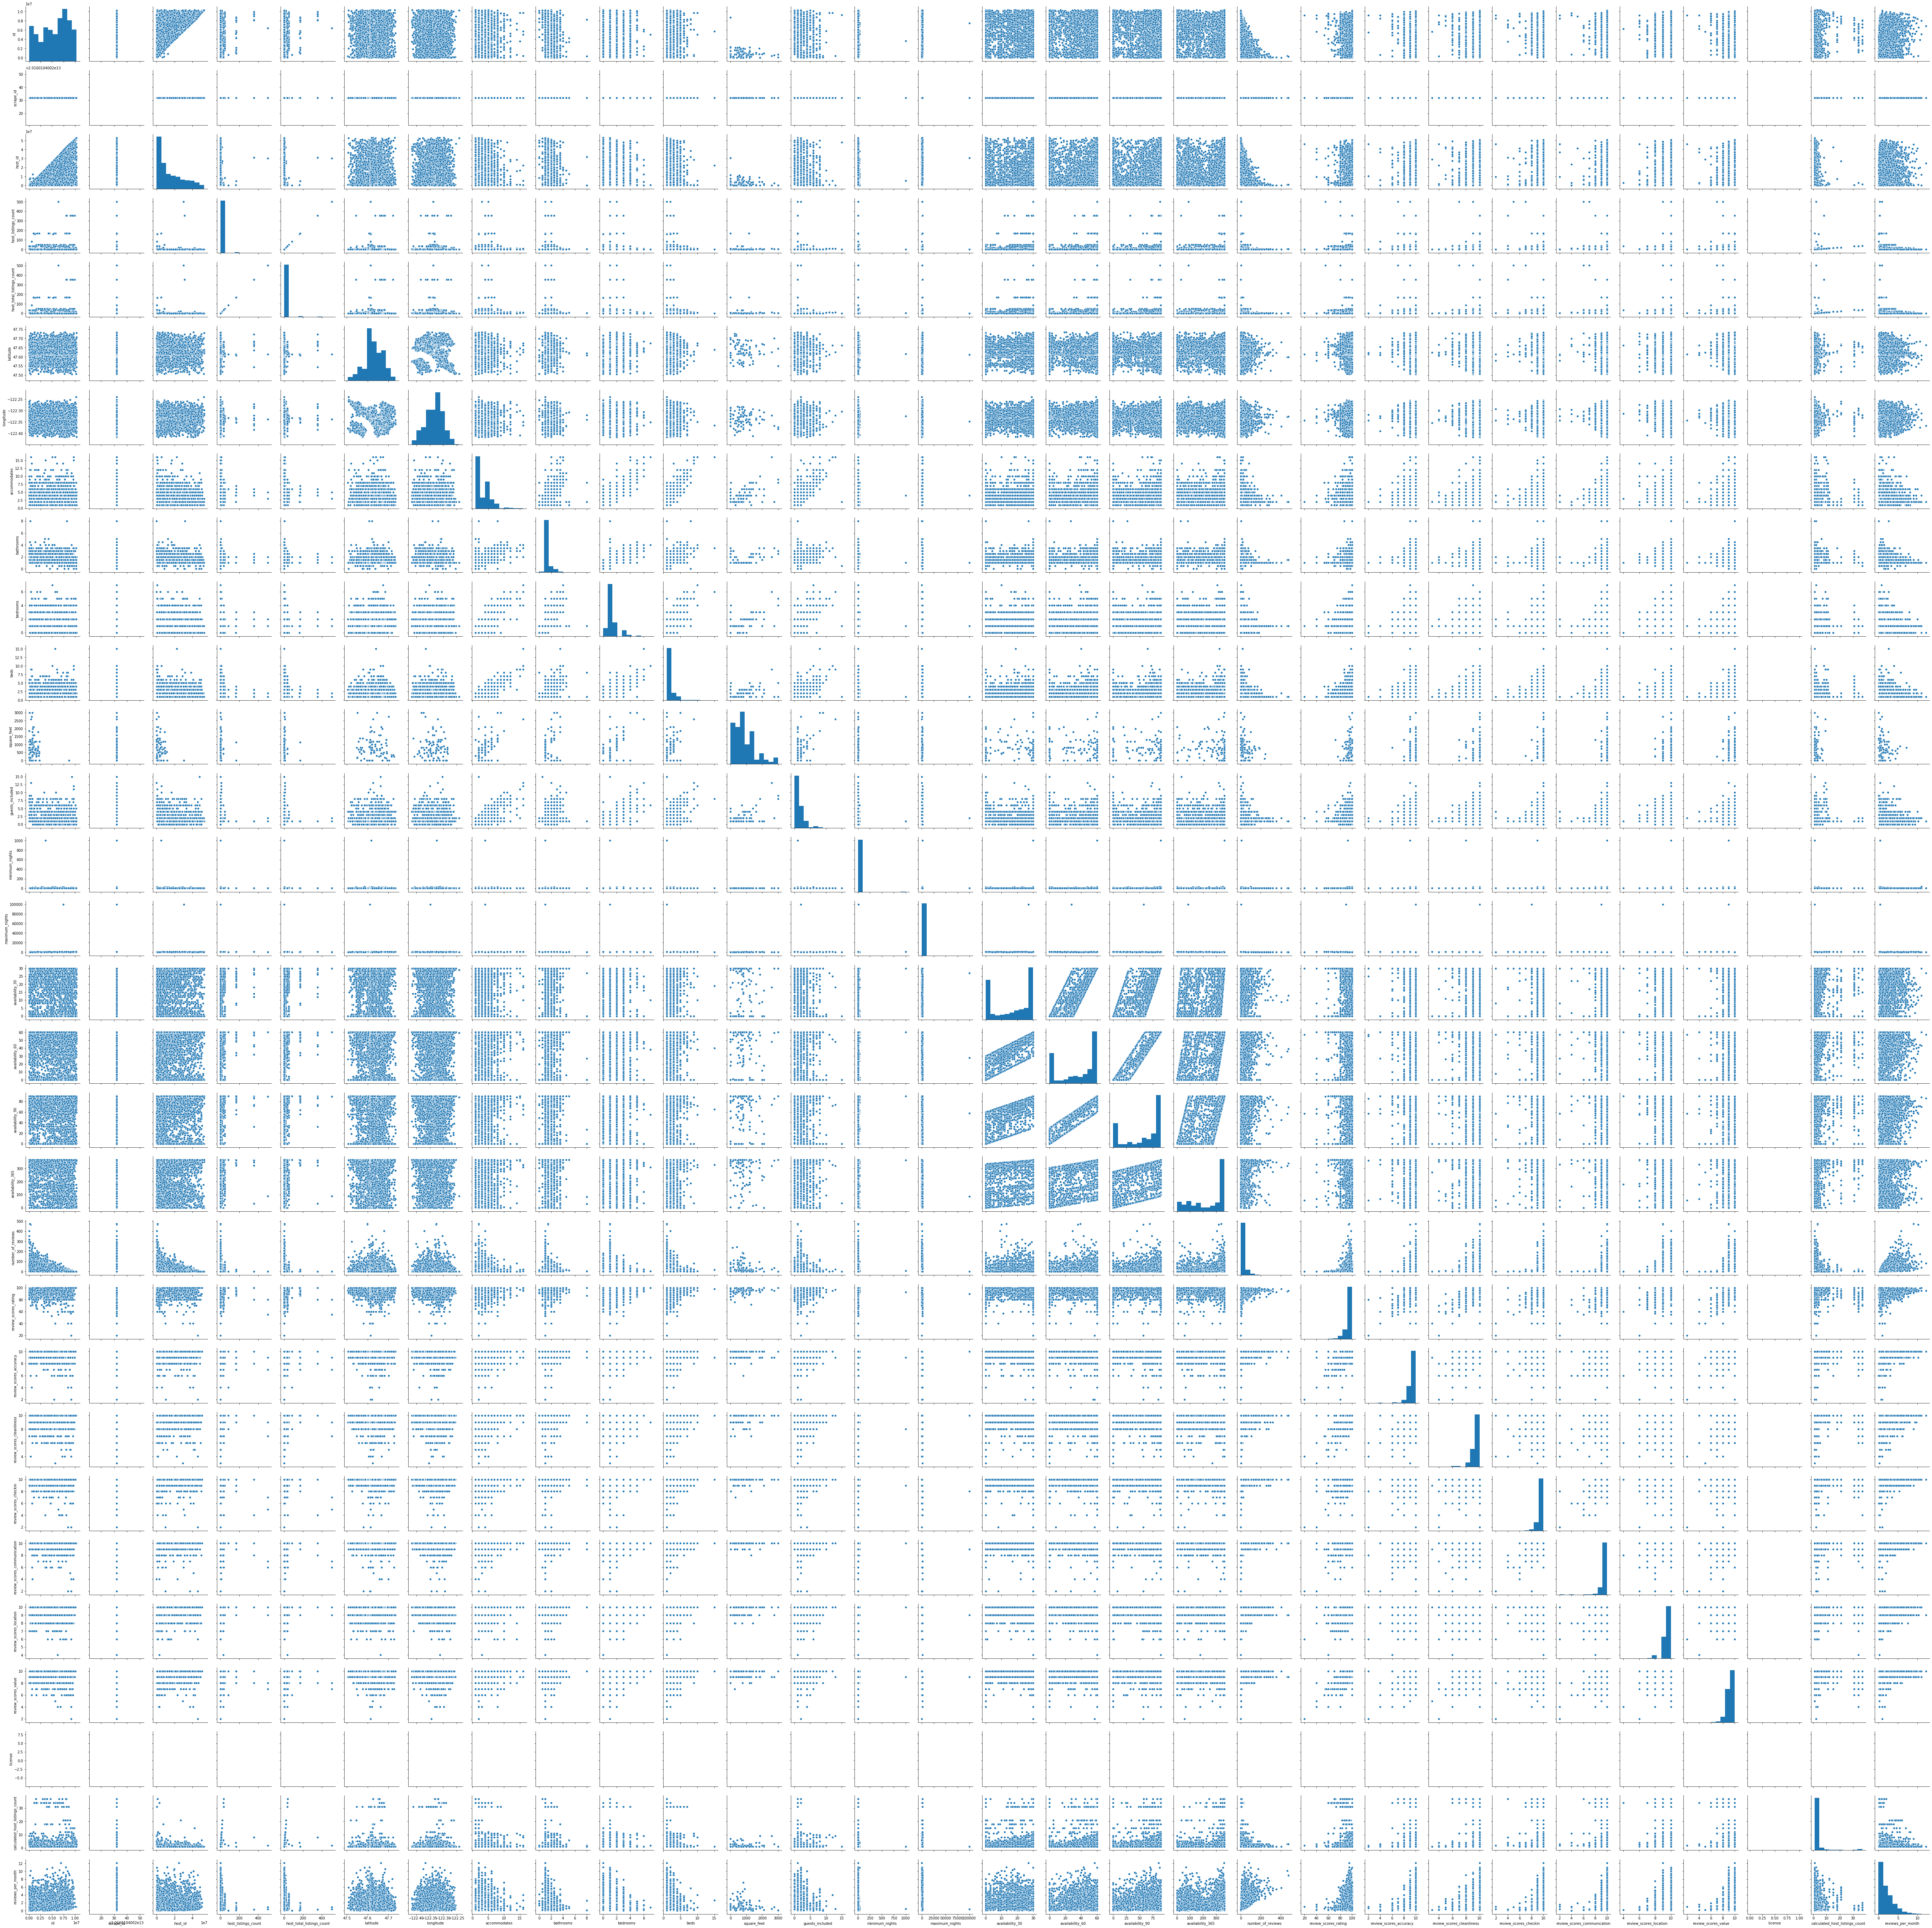

In [270]:
#Lets look at cross plot 
sns.pairplot(df_listings)

In [287]:
df_listings.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [288]:
df_listings.columns[df_listings.dtypes != 'O']

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

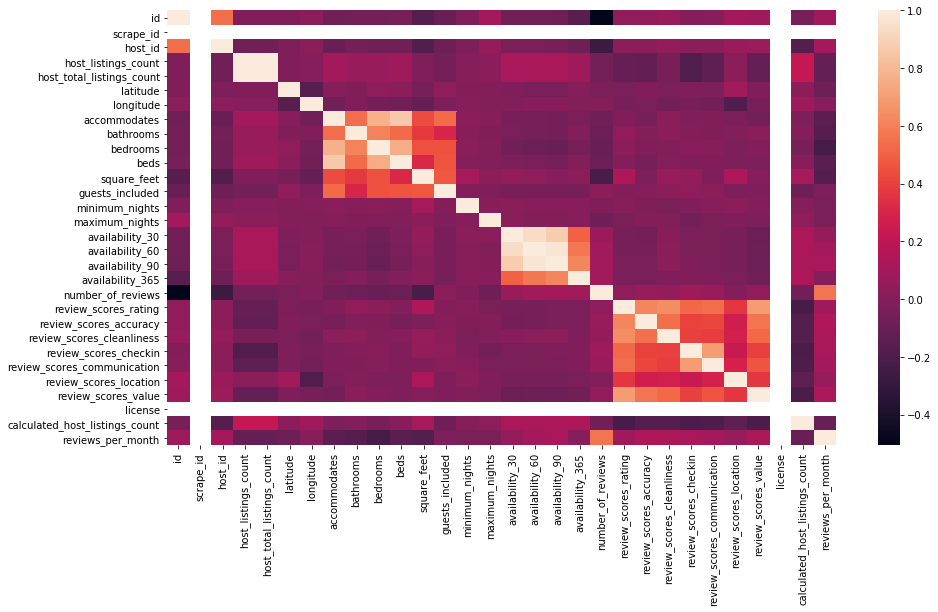

In [296]:
#Lets plot correlatin matrix for numeric variables
cols = df_listings.columns[df_listings.dtypes != 'O']
plt.figure(figsize=(15,8))
sns.heatmap(df_listings[cols].corr())
plt.show()

In [297]:
#Lets look at character variables
df_listings.columns[df_listings.dtypes == 'O']


Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

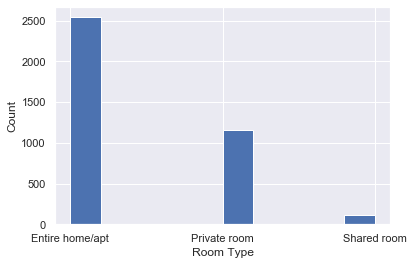

In [314]:
#Lets look at Room Type
sns.set()
_ = plt.hist(df_listings['room_type'])
_ = plt.xlabel("Room Type")
_ = plt.ylabel("Count")
plt.show();

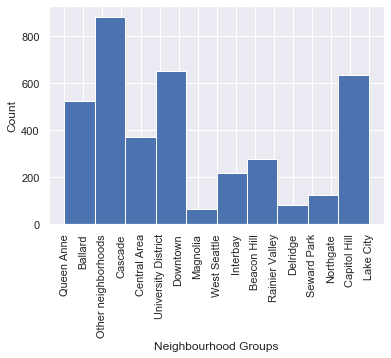

In [313]:
#plt.figure(figsize=(15,8))
sns.set()
_ = plt.hist(df_listings['neighbourhood_group_cleansed'])
_ = plt.xticks(rotation='vertical')
_ = plt.xlabel("Neighbourhood Groups")
_ = plt.ylabel("Count")
#fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical');
plt.show();

In [315]:
df_listings.cancellation_policy.value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [316]:
df_listings.require_guest_phone_verification.value_counts()

f    3443
t     375
Name: require_guest_phone_verification, dtype: int64

In [317]:
df_listings.require_guest_profile_picture.value_counts()

f    3497
t     321
Name: require_guest_profile_picture, dtype: int64

In [242]:
# Analyzing Calendar data 
df_calendar.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [243]:
df_calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [264]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  int64  
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  object 
 3   price       934542 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 42.5+ MB


In [244]:
# Lets looks at listing ids
# Number of unique listing IDs
df_calendar.listing_id.nunique()

3818

In [245]:
# Number of unique dates for listings
df_calendar.date.nunique()

365

In [248]:
# As number of dates are 365, would like to see maximum and minimum values
print("Min date for listings ",df_calendar.date.min())
print("Max date for listings ",df_calendar.date.max())

Min date for listings  2016-01-04
Max date for listings  2017-01-02


In [249]:
df_calendar.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [259]:
# Checking if listing is available and price is Null or vice versa
df_calendar[(df_calendar.available == 't') & (df_calendar.price.isnull())]

Empty DataFrame
Columns: [listing_id, date, available, price]
Index: []

In [260]:
# Updateing Price to convert to int format
df_calendar['price'] = df_calendar['price'].str.replace(',', '')
df_calendar['price'] = df_calendar['price'].str.replace('$', '')
df_calendar['price'] = df_calendar['price'].astype(float)

In [263]:
# Checking minimum and maximum price
df_calendar.price.describe()

count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

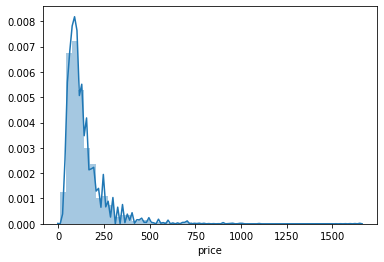

In [261]:
# Checking price distribution
sns.distplot(df_calendar.price);

Calendar dataset has 3818 unique listings with price range from $10 to $1650 with average price of $137.95 for the year 2016.

In [266]:
#Lets look at Reviews dataset
df_reviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

In [267]:
df_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [268]:
#Lets look at if all 3818 listings has review
df_reviews.listing_id.nunique()

3191

In [269]:
#Lets look at review timelines as calendar data is for 2016
print("Minimum date for review", df_reviews.date.min());
print("maximum date for review", df_reviews.date.max());

Minimum date for review 2009-06-07
maximum date for review 2016-01-03


### Data Preparation for model building

The first step in our process will be to remove all columns with more than 50% missing values. It will be difficult to impute these values since most of the attribute values will be guessed. Next, for the attributes with more than 30% missing values, we will impute them individually. These are Notes, Weekly Price. Notes are freeform text values. Since we will not be doing any natural language processing, we can drop them.

In [324]:
# Missing values
missing_vars = df_listings.isnull().mean()

In [327]:
#Lets look at columns with more than 50% missing rows
missing_gt_50 = df_listings.columns[missing_vars > 0.50]

In [360]:
missing_gt_50

Index(['square_feet', 'monthly_price', 'security_deposit', 'license'], dtype='object')

In [328]:
#Lets drop columns with greater than 50% missing values
df_listings = df_listings.drop(missing_gt_50, axis=1)

In [335]:
missing_vars[(missing_vars > 0.3) & (missing_vars < 0.5)]

notes           0.420639
weekly_price    0.473808
dtype: float64

In [345]:
df_listings.notes.head()

0                                                  NaN
1    What's up with the free pillows?  Our home was...
2    Our house is located just 5 short blocks to To...
3                                                  NaN
4                                            Belltown 
Name: notes, dtype: object

As column 'notes' is free form text, we will be dropping it. 

In [356]:
df_listings = df_listings.drop('notes', axis=1)

In [348]:
# Converting weekly_price from string to float
df_listings['weekly_price'] = df_listings['weekly_price'].str.replace(',', '')
df_listings['weekly_price'] = df_listings['weekly_price'].str.replace('$', '')
df_listings['weekly_price'] = df_listings['weekly_price'].astype(float)

In [354]:
# Imputing missing values as mean of the column
df_listings['weekly_price'] = df_listings['weekly_price'].fillna(np.mean(df_listings['weekly_price']));

In [355]:
df_listings.weekly_price.head()

0     788.481832
1    1000.000000
2     788.481832
3     650.000000
4     788.481832
Name: weekly_price, dtype: float64

In [366]:
# Lets look at all variable with less than 30% missing values
missing_vars[(missing_vars < 0.3)]

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
                                      ...   
cancellation_policy                 0.000000
require_guest_profile_picture       0.000000
require_guest_phone_verification    0.000000
calculated_host_listings_count      0.000000
reviews_per_month                   0.164222
Length: 86, dtype: float64

From the above variables there are different types of variables which need to handle missing data.

In [387]:
# Columns with missing values
missing_vars[((missing_vars < 0.3)&(missing_vars > 0.0))].index.to_list()

['summary',
 'space',
 'neighborhood_overview',
 'transit',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'zipcode',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [ ]:
# Attributes
free_text_attributes = ['summary', 'space', 'neighborhood_overview', 'transit', 'host_about'] #5
url_attributes = ['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_thumbnail_url', 'host_picture_url'] #5
numeric_attributes = ['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month'] #11
bool_attributes = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified'] #3
date_attributes = ['host_since', 'first_review', 'last_review', ] #3
drop_attributes = ['host_location' ] #1
char_attributes =['host_response_time', 'host_neighbourhood', 'neighbourhood'] #host_response_time = 'Non Response'
drop_rows_attributes = ['host_listings_count', 'host_total_listings_count'] # IDs (8354452, 10235014)
max_value_attributes = ['zipcode', 'property_type']
median_value_attributes = ['bathrooms', 'bedrooms', 'beds']
money_attributes = ['cleaning_fee']

In [ ]:
Host Ids 42515980 & 1075031 have most of the data null, we can delete those rows. #host_listings_count

In [ ]:
#Character variables which needs to be one-hot-encoded with dummies
char_attribute = ['experiences_offered', 'host_location', 'host_response_time', 'host_neighbourhood', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']

In [ ]:
# Numeric fields which we will impute
numeric_attribute = []

In [409]:
missing_vars[((missing_vars < 0.3)&(missing_vars > 0.0))].count()

39

In [404]:
missing_vars['bathrooms']

0.0041906757464641176

In [406]:
missing_vars['host_listings_count']

0.0005238344683080147

In [412]:
missing_vars['host_total_listings_count']

0.0005238344683080147

In [396]:
df_listings.host_response_time.value_counts(dropna=False)

within an hour        1692
within a few hours     968
within a day           597
NaN                    523
a few days or more      38
Name: host_response_time, dtype: int64

In [398]:
df_listings[df_listings.host_listings_count.isnull()]

id                            listing_url       scrape_id  \
1297   8354452   https://www.airbnb.com/rooms/8354452  20160104002432   
1419  10235014  https://www.airbnb.com/rooms/10235014  20160104002432   

     last_scraped                                name  \
1297   2016-01-04   The View | Be Inspired in Seattle   
1419   2016-01-04  Luxury Apartment in Belltown / SLU   

                                                summary  \
1297  A studio with stunning waterfront view worth t...   
1419  Beautiful building near the heart of downtown ...   

                                                  space  \
1297  Looking for that perfect spot to take-in all o...   
1419                                                NaN   

                                            description experiences_offered  \
1297  A studio with stunning waterfront view worth t...                none   
1419  Beautiful building near the heart of downtown ...                none   

                                  neighborhood_overview  \
1297  This spot is in Belltown across the street fro...   
1419                                                NaN   

                                                transit  \
1297  Seattle has a lot of transportation options in...   
1419                                                NaN   

                                          thumbnail_url  \
1297  https://a2.muscache.com/ac/pictures/6d46a5de-9...   
1419  https://a2.muscache.com/ac/pictures/2644576c-4...   

                                             medium_url  \
1297  https://a2.muscache.com/im/pictures/6d46a5de-9...   
1419  https://a2.muscache.com/im/pictures/2644576c-4...   

                                            picture_url  \
1297  https://a2.muscache.com/ac/pictures/6d46a5de-9...   
1419  https://a2.muscache.com/ac/pictures/2644576c-4...   

                                         xl_picture_url   host_id  \
1297  https://a2.muscache.com/ac/pictures/6d46a5de-9...  42515980   
1419  https://a2.muscache.com/ac/pictures/2644576c-4...   1075031   

                                        host_url host_name host_since  \
1297  https://www.airbnb.com/users/show/42515980       NaN        NaN   
1419   https://www.airbnb.com/users/show/1075031       NaN        NaN   

     host_location host_about host_response_time host_response_rate  \
1297           NaN        NaN                NaN                NaN   
1419           NaN        NaN                NaN                NaN   

     host_acceptance_rate host_is_superhost host_thumbnail_url  \
1297                  NaN               NaN                NaN   
1419                  NaN               NaN                NaN   

     host_picture_url host_neighbourhood  host_listings_count  \
1297              NaN                NaN                  NaN   
1419              NaN                NaN                  NaN   

      host_total_listings_count host_verifications host_has_profile_pic  \
1297                        NaN               None                  NaN   
1419                        NaN               None                  NaN   

     host_identity_verified                                            street  \
1297                    NaN  Western Avenue, Seattle, WA 98121, United States   
1419                    NaN      6th Avenue, Seattle, WA 98121, United States   

     neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed  \
1297      Belltown               Belltown                     Downtown   
1419      Belltown               Belltown                     Downtown   

         city state zipcode   market smart_location country_code  \
1297  Seattle    WA   98121  Seattle    Seattle, WA           US   
1419  Seattle    WA   98121  Seattle    Seattle, WA           US   

            country   latitude   longitude is_location_exact property_type  \
1297  United States  47.616705 -122.353969                 t     Apartment   
1419  United States  47.615974 -122.340537   

In [399]:
df_listings.loc[df_listings.host_listings_count.isnull(),'thumbnail_url']

1297    https://a2.muscache.com/ac/pictures/6d46a5de-9...
1419    https://a2.muscache.com/ac/pictures/2644576c-4...
Name: thumbnail_url, dtype: object

In [403]:
df_listings.host_response_rate.isnull().sum()

523

In [402]:
df_listings[df_listings.host_id == 42515980]

id                           listing_url       scrape_id  \
1297  8354452  https://www.airbnb.com/rooms/8354452  20160104002432   

     last_scraped                               name  \
1297   2016-01-04  The View | Be Inspired in Seattle   

                                                summary  \
1297  A studio with stunning waterfront view worth t...   

                                                  space  \
1297  Looking for that perfect spot to take-in all o...   

                                            description experiences_offered  \
1297  A studio with stunning waterfront view worth t...                none   

                                  neighborhood_overview  \
1297  This spot is in Belltown across the street fro...   

                                                transit  \
1297  Seattle has a lot of transportation options in...   

                                          thumbnail_url  \
1297  https://a2.muscache.com/ac/pictures/6d46a5de-9...   

                                             medium_url  \
1297  https://a2.muscache.com/im/pictures/6d46a5de-9...   

                                            picture_url  \
1297  https://a2.muscache.com/ac/pictures/6d46a5de-9...   

                                         xl_picture_url   host_id  \
1297  https://a2.muscache.com/ac/pictures/6d46a5de-9...  42515980   

                                        host_url host_name host_since  \
1297  https://www.airbnb.com/users/show/42515980       NaN        NaN   

     host_location host_about host_response_time host_response_rate  \
1297           NaN        NaN                NaN                NaN   

     host_acceptance_rate host_is_superhost host_thumbnail_url  \
1297                  NaN               NaN                NaN   

     host_picture_url host_neighbourhood  host_listings_count  \
1297              NaN                NaN                  NaN   

      host_total_listings_count host_verifications host_has_profile_pic  \
1297                        NaN               None                  NaN   

     host_identity_verified                                            street  \
1297                    NaN  Western Avenue, Seattle, WA 98121, United States   

     neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed  \
1297      Belltown               Belltown                     Downtown   

         city state zipcode   market smart_location country_code  \
1297  Seattle    WA   98121  Seattle    Seattle, WA           US   

            country   latitude   longitude is_location_exact property_type  \
1297  United States  47.616705 -122.353969                 t     Apartment   

            room_type  accommodates  bathrooms  bedrooms  beds  bed_type  \
1297  Entire home/apt             2        1.0       0.0   1.0  Real Bed   

                                              amenities   price  weekly_price  \
1297  {TV,Internet,"Wireless Internet","Air Conditio...  $99.00         725.0   

     cleaning_fee  guests_included extra_people  minimum_nights  \
1297       $25.00                1       $25.00               2   

      maximum_nights calendar_updated has_availability  availability_30  \
1297              13     2 months ago                t               30   

      availability_60  availability_90  availability_365  \
1297               60               89                89   

     calendar_last_scraped  number_of_reviews first_review last_review  \
1297            2016-01-04                  0          NaN         NaN   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
1297                   NaN                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
1297                    NaN                          NaN   

      review_scores_location  review_scores_value requires_license  \
1297                     NaN                  NaN                f   

     jurisdictio

In [449]:
# Update missing zipcodes with zipcode with maxium value count(i.e. 98122)
df_listings.zipcode.value_counts(dropna=False).idxmax()

'98122'

In [452]:
# There is only 1 Null value in Property Type which should be replaced by max value for property type(i.e. House)
df_listings.property_type.value_counts(dropna=False)

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
NaN                   1
Name: property_type, dtype: int64

In [454]:
df_listings[df_listings.property_type.isnull()]

id                        listing_url       scrape_id last_scraped  \
2184  3335  https://www.airbnb.com/rooms/3335  20160104002432   2016-01-04   

                                     name  \
2184  Sweet Seattle Urban Homestead 2 Bdr   

                                                summary  \
2184  Welcome! If you stay here you will be living i...   

                                                  space  \
2184  Welcome!  Come enjoy your time in Seattle at a...   

                                            description experiences_offered  \
2184  Welcome! If you stay here you will be living i...                none   

                                  neighborhood_overview  \
2184  This is a very diverse neighborhood with a var...   

                                                transit  \
2184  Light rail is walking distance, bus lines are ...   

                                          thumbnail_url  \
2184  https://a1.muscache.com/ac/pictures/76027692/e...   

                                             medium_url  \
2184  https://a1.muscache.com/im/pictures/76027692/e...   

                                            picture_url  \
2184  https://a1.muscache.com/ac/pictures/76027692/e...   

                                         xl_picture_url  host_id  \
2184  https://a1.muscache.com/ac/pictures/76027692/e...     4193   

                                    host_url host_name  host_since  \
2184  https://www.airbnb.com/users/show/4193   Jessica  2008-11-10   

                           host_location  \
2184  Seattle, Washington, United States   

                                             host_about  host_response_time  \
2184  Hello!  I am an avid gardener, community organ...  within a few hours   

     host_response_rate host_acceptance_rate host_is_superhost  \
2184                88%                 100%                 f   

                                     host_thumbnail_url  \
2184  https://a2.muscache.com/ac/users/4193/profile_...   

                                       host_picture_url host_neighbourhood  \
2184  https://a2.muscache.com/ac/users/4193/profile_...             Dunlap   

      host_listings_count  host_total_listings_count  \
2184                  4.0                        4.0   

                                    host_verifications host_has_profile_pic  \
2184  ['email', 'phone', 'facebook', 'reviews', 'kba']                    t   

     host_identity_verified  \
2184                      t   

                                                 street neighbourhood  \
2184  44th Place South, Seattle, WA 98118, United St...        Dunlap   

     neighbourhood_cleansed neighbourhood_group_cleansed     city state  \
2184                 Dunlap               Rainier Valley  Seattle    WA   

     zipcode   market smart_location country_code        country   latitude  \
2184   98118  Seattle    Seattle, WA           US  United States  47.529846   

      longitude is_location_exact property_type        room_type  \
2184 -122.27584                 t           NaN  Entire home/apt   

      accommodates  bathrooms  bedrooms  beds  bed_type  \
2184             4        1.0       2.0   2.0  Real Bed   

                                              amenities    price  \
2184  {"Wireless Internet",Kitchen,"Free Parking on ...  $120.00   

      weekly_price cleaning_fee  guests_included extra_people  minimum_nights  \
2184         550.0       $75.00                2       $10.00               2   

      maximum_nights calendar_updated has_availability  availability_30  \
2184             730     3 months ago                t                0   

      availability_60  availability_90  availability_365  \
2184                4               34               309   

     calendar_last_scraped  number_of_reviews first_review last_review  \
2184            2016-01-04                  0          NaN         NaN   

      review_scores_rating  review_scores_accuracy  review_score

In [456]:
df_listings.bathrooms.value_counts(dropna=False)

1.0    2882
2.0     373
1.5     248
2.5     124
3.0      64
3.5      57
0.5      31
NaN      16
0.0       8
4.0       8
4.5       3
5.0       2
8.0       2
Name: bathrooms, dtype: int64

In [458]:
df_listings.bathrooms.median()

1.0

In [459]:
df_listings.bedrooms.value_counts(dropna=False)

1.0    2417
2.0     640
0.0     372
3.0     283
4.0      69
5.0      24
NaN       6
6.0       6
7.0       1
Name: bedrooms, dtype: int64

In [463]:
df_listings.bedrooms.median()

1.0

In [465]:
df_listings.beds.value_counts(dropna=False)

1.0     2201
2.0      912
3.0      433
4.0      152
5.0       73
6.0       21
7.0       14
8.0        4
9.0        4
10.0       2
NaN        1
15.0       1
Name: beds, dtype: int64

In [466]:
df_listings.cleaning_fee.value_counts(dropna=False)

NaN        1030
$50.00      310
$25.00      245
$60.00      185
$20.00      171
           ... 
$275.00       1
$42.00        1
$130.00       1
$179.00       1
$230.00       1
Name: cleaning_fee, Length: 119, dtype: int64

In [455]:
df_listings[df_listings.host_id==4193]

id                           listing_url       scrape_id  \
2184     3335     https://www.airbnb.com/rooms/3335  20160104002432   
2190  6117473  https://www.airbnb.com/rooms/6117473  20160104002432   
2192  7745016  https://www.airbnb.com/rooms/7745016  20160104002432   
2194  1263470  https://www.airbnb.com/rooms/1263470  20160104002432   

     last_scraped                                 name  \
2184   2016-01-04  Sweet Seattle Urban Homestead 2 Bdr   
2190   2016-01-04          Urban TREEHOUSE & Homestead   
2192   2016-01-04  Single Bdr @Seattle Urban Homestead   
2194   2016-01-04  Sweet Seattle Urban Homestead 1 Bdr   

                                                summary  \
2184  Welcome! If you stay here you will be living i...   
2190  This is an open air 20 x 10 treehouse platform...   
2192  Join us for a spell at our comfortable and wel...   
2194  Welcome! If you stay here you will be living i...   

                                                  space  \
2184  Welcome!  Come enjoy your time in Seattle at a...   
2190  Welcome!  Come enjoy your time in Seattle at a...   
2192                                                NaN   
2194  Welcome! If you stay here you will be living i...   

                                            description experiences_offered  \
2184  Welcome! If you stay here you will be living i...                none   
2190  This is an open air 20 x 10 treehouse platform...                none   
2192  Join us for a spell at our comfortable and wel...                none   
2194  Welcome! If you stay here you will be living i...                none   

                                  neighborhood_overview  \
2184  This is a very diverse neighborhood with a var...   
2190  We have a very diverse and friendly neighborho...   
2192                                                NaN   
2194  This is a very diverse neighborhood with a var...   

                                                transit  \
2184  Light rail is walking distance, bus lines are ...   
2190  Easy walking distance to light rail and buses....   
2192                                                NaN   
2194  Light rail in walking distance to airport and ...   

                                          thumbnail_url  \
2184  https://a1.muscache.com/ac/pictures/76027692/e...   
2190  https://a1.muscache.com/ac/pictures/88387479/e...   
2192  https://a2.muscache.com/ac/pictures/98464349/6...   
2194  https://a0.muscache.com/ac/pictures/19040366/9...   

                                             medium_url  \
2184  https://a1.muscache.com/im/pictures/76027692/e...   
2190  https://a1.muscache.com/im/pictures/88387479/e...   
2192  https://a2.muscache.com/im/pictures/98464349/6...   
2194  https://a0.muscache.com/im/pictures/19040366/9...   

                                            picture_url  \
2184  https://a1.muscache.com/ac/pictures/76027692/e...   
2190  https://a1.muscache.com/ac/pictures/88387479/e...   
2192  https://a2.muscache.com/ac/pictures/98464349/6...   
2194  https://a0.muscache.com/ac/pictures/19040366/9...   

                                         xl_picture_url  host_id  \
2184  https://a1.muscache.com/ac/pictures/76027692/e...     4193   
2190  https://a1.muscache.com/ac/pictures/88387479/e...     4193   
2192  https://a2.muscache.com/ac/pictures/98464349/6...     4193   
2194  https://a0.muscache.com/ac/pictures/19040366/9...     4193   

                                    host_url host_name  host_since  \
2184  https://www.airbnb.com/users/show/4193   Jessica  2008-11-10   
2190  https://www.airbnb.com/users/show/4193   Jessica  2008-11-10   
2192  https://www.airbnb.com/users/show/4193   Jessica  2008-11-10   
2194  https://www.airbnb.com/users/show/4193   Jessica  2008-11-10   

                           host_location  \
2184  Seattle, Washington, United States   
2190  Seattle, Washington, United States   
2192  Seattle, Washington, United States   
2194  Seattle, Washington, U

In [415]:
df_listings[df_listings.zipcode == '99\n98122']

id                           listing_url       scrape_id  \
859  9448215  https://www.airbnb.com/rooms/9448215  20160104002432   

    last_scraped          name  \
859   2016-01-04  Capital hill   

                                               summary space  \
859  Large room in Seattle's best neighborhood,  ca...   NaN   

                                           description experiences_offered  \
859  Large room in Seattle's best neighborhood,  ca...                none   

    neighborhood_overview transit  \
859                   NaN     NaN   

                                         thumbnail_url  \
859  https://a2.muscache.com/ac/pictures/021fb137-4...   

                                            medium_url  \
859  https://a2.muscache.com/im/pictures/021fb137-4...   

                                           picture_url  \
859  https://a2.muscache.com/ac/pictures/021fb137-4...   

                                        xl_picture_url   host_id  \
859  https://a2.muscache.com/ac/pictures/021fb137-4...  48441443   

                                       host_url host_name  host_since  \
859  https://www.airbnb.com/users/show/48441443  Savannah  2015-11-07   

    host_location host_about host_response_time host_response_rate  \
859            US        NaN       within a day                60%   

    host_acceptance_rate host_is_superhost  \
859                 100%                 f   

                                    host_thumbnail_url  \
859  https://a2.muscache.com/ac/pictures/6beda013-2...   

                                      host_picture_url host_neighbourhood  \
859  https://a2.muscache.com/ac/pictures/6beda013-2...                NaN   

     host_listings_count  host_total_listings_count  \
859                  3.0                        3.0   

                                   host_verifications host_has_profile_pic  \
859  ['email', 'phone', 'google', 'reviews', 'jumio']                    t   

    host_identity_verified                                          street  \
859                      t  14th Ave, Seattle, WA 99\n98122, United States   

    neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed  \
859           NaN                  Minor                 Central Area   

        city state    zipcode   market smart_location country_code  \
859  Seattle    WA  99\n98122  Seattle    Seattle, WA           US   

           country   latitude  longitude is_location_exact property_type  \
859  United States  47.611079 -122.31282                 f         House   

        room_type  accommodates  bathrooms  bedrooms  beds  bed_type  \
859  Private room             2        1.0       1.0   1.0  Real Bed   

    amenities   price  weekly_price cleaning_fee  guests_included  \
859        {}  $67.00    788.481832          NaN                1   

    extra_people  minimum_nights  maximum_nights calendar_updated  \
859        $0.00               1            1125      2 weeks ago   

    has_availability  availability_30  availability_60  availability_90  \
859                t               30               60               90   

     availability_365 calendar_last_scraped  number_of_reviews first_review  \
859               365            2016-01-04                  1   2015-12-12   

    last_review  review_scores_rating  review_scores_accuracy  \
859  2015-12-12                 100.0                    10.0   

     review_scores_cleanliness  review_scores_checkin  \
859                        8.0                   10.0   

     review_scores_communication  review_scores_location  review_scores_value  \
859                         10.0                    10.0                 10.0   

    requires_license jurisdiction_names instant_bookable cancellation_policy  \
859                f         WASHINGTON                f            flexible   

    require_guest_profile_picture require_guest_phone_verification  \
859                             f                          

In [418]:
df_listings.loc[df_listings.id == 9448215,'zipcode'] = 98122

859    99\n98122
Name: zipcode, dtype: object

In [419]:
# Update the value for zipcode
df_listings.loc[df_listings.id == 9448215,'zipcode'] = 98122

In [420]:
df_listings.loc[df_listings.id == 9448215,'zipcode']

859    98122
Name: zipcode, dtype: object

In [391]:
pd.set_option('display.max_columns', 500)
df_listings[missing_vars[((missing_vars < 0.3)&(missing_vars > 0.0))].index.to_list()].head()

summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   
3                                                NaN   
4  We are in the beautiful neighborhood of Queen ...   

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   
3                                                NaN   
4  The nearest public transit bus (D Line) is 2 b...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      xl_picture_url host_name  host_since  \
0                                                NaN     Maija  2011-08-11   
1  https://a0.muscache.com/ac/pictures/14409893/f...    Andrea  2013-02-21   
2                                                NaN      Jill  2014-06-12   
3                                                NaN     Emily  2013-11-06   
4                                                NaN     Emily  2011-11-29   

                        host_location  \
0  Seattle, Washington, United States   
1  Seattle, Washington, United States   
2  Seattle, Washington, United States   
3  Seattle, Washington, United States   
4  Seattle, Washington, United States   

                                          host_about  host_response_time  \
0  I am an artist, interior designer, and run a s...  within a few hours   
1  Living east coast/left coast/overseas.  Time i...      within an hour   
2  i love living in Seattle.  i grew up in the mi...  within a few hours   
3                                                NaN                 NaN   
4  Hi, I live in Seattle, Washington but I'm orig...      within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                96%                 100%                 f   
1                98%                 100%                 t   
2                67%                 100%                 f   
3                NaN                  NaN                 f   
4               100%                  NaN                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/ac/users/956883/profil...   
1  https://a0.muscache.com/ac/users/5177328/profi...   
2  https://a1.muscache.com/ac/users/16708587/prof...   
3  https://a2.muscache.com/ac/users/9851441/profi...   
4  https://a0.muscache.com/ac/users/1452570/profi...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/ac/users/956883/profil...       

In [ ]:
free_text_attribute = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'interaction', 'house_rules', 'host_about']

In [388]:
missing_vars[(missing_vars < 0.3)].index.to_list()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'experiences_offered',
 'picture_url',
 'host_id',
 'host_url',
 'host_verifications',
 'street',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'room_type',
 'accommodates',
 'bed_type',
 'amenities',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'requires_license',
 'jurisdiction_names',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count']

In [ ]:
# Gathering the different types of Non-numerical features
categorical_attributes = ['experiences_offered', 'host_location', 'host_response_time', 'host_neighbourhood', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'property_type', 'room_type', 'bed_type', 'cancellation_policy'];
full_text_attributes = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'interaction', 'house_rules', 'host_about']
dropping_attributes = ['listing_url', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'last_scraped', 'host_name', 'calendar_last_scraped', 'calendar_updated']
date_attributes = ['host_since', 'first_review', 'last_review']
bool_attributes = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'has_availability', 'requires_license', 'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification']
array_attributes = ['host_verifications', 'amenities', 'jurisdiction_names']
money_attributes = ['extra_people', 'cleaning_fee', 'security_deposit', 'price']